<div style="border:solid green 2px; padding: 20px">
    
~~Дмитрий, привет! Меня зовут Бунакова Влада. Если не возражаешь, предлагаю общаться на «ты» :)
Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='orange'>желтый — «хорошо, но можно лучше»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###». Пожалуйста, не удаляй мои комментарии, они мне нужны при повторной проверке. Будет здорово, если в своих новых комментариях (выделяй их другим цветом) ты напишешь о сделанных тобой изменениях в коде.~~
    
Дмитрий, спасибо! Осталось всего одно небольшое замечание.
    
### <font color='purple'> Не обратил внимание, что размер выборок изменился, поправил)

## <font color='purple'> Влада, приветствую Вас)!!!

# Условие задачи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

#### Оператор предоставляет два основных типа услуг:

<br>1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
<br>
<br>2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

#### Также доступны такие услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# 1. EDA

### 1.1 Откроем и изучим данные

In [1]:
import pandas as pd

###  Информация о договоре

In [2]:
contract = pd.read_csv('contract.csv')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [3]:
contract.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


### пропусков нет, всё четко :)

###  Поищем аномалии для признака MonthlyCharges

Признак TotalCharges я проверять не буду, да и вообще планирую его удалить из датасета, т.к. он сильно привязан к сроку жизни клиента, а за какой срок данные клиент будет закидывать в модель - это неизвестно. Пока не знаю, насколько это правильное решение, т.к. количественных признаков в модели и так всего два) А из признака BeginDate хочу оставить только номер месяца.

In [4]:
contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

- Минимально значение = 18 
- Максимальное = 118
- Среднее = 65
- Стд. отклонение = 30
- по минимвльному и максимальному значению всё четко, похоже на правду и в 3 сигмы укладывается. Но вот стандартное отклонение мне всё равно кажется большим, посмотрим на гистограмму и постараемся понять, откуда оно такое взялось

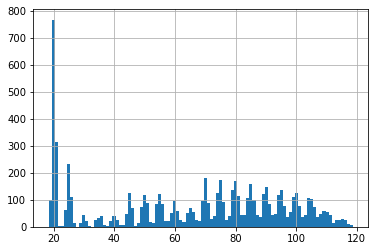

In [5]:
contract['MonthlyCharges'].hist(bins=100)

какое-то непонятное распределение:)) но в целом чего-то аномального я не вижу, есть большя группа людей, которые платят минимальную стоимость, а остальные пользователи более менее равномерно разбросаны по всему ценовому диапозону. Высокое стандартное отклонение я могу объяснить этим большим пиком в районе 20. Для четкости добьём всё это дело ящиком с усами!

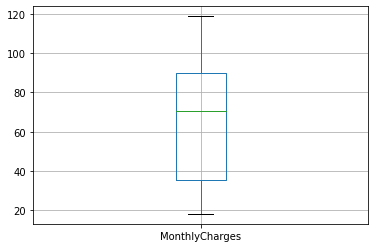

In [6]:
contract.boxplot(column='MonthlyCharges')

Ящик показывает, что 25% клиентов, платят до 35$ - тот самый пик на гистограмме (т.е. четверть клиентов пользуются услугами компании по минимуму)

### Признак EndDate - это наш целевой признак, сразу проверим дисбаланс классов

In [7]:
print('Положительный класс -', contract[contract['EndDate'] == 'No']['EndDate'].count())
print('Отрицательный класс -', contract[contract['EndDate'] != 'No']['EndDate'].count()) 

Положительный класс - 5174
Отрицательный класс - 1869


###  Информация о пользователе

In [8]:
personal = pd.read_csv('personal.csv')
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
personal.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### Информация о тарифах

In [10]:
internet = pd.read_csv('internet.csv')
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [11]:
internet.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
phone = pd.read_csv('phone.csv')
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### Вывод:  В целом данные выглядят довольно понятными и аккуратными), нет какой-то жести. Перед нами стоит задача обучить модель, которая будет определять пользователя в одну из двух категорий (дать скидку или не дать скидку), т.е. эта задача классификации. Имеется дисбаланс классов, от которого необходимо избавиться до обучения модели, а также много категориальных признаков, которые необходимо будет закодировать. Ниже я привожу небольшой план работ и возникшие вопросы.

# ПЛАН РАБОТ

### 1. Соединить все данные в одну таблицу.
- Для этого у нас есть customerID, признак, по которому мы будем соединять данные.


### 2. Провести предобработку данных
- Удалить ненужные признаки и создать новые
- Закодировать категориальные данные
- Масштабировать признаки
- Избавиться от дисбаланса классов
- Разделить признаки и целевой признак
- Разбить датасет на трейн, валид и тест

### 3. Обучить различные модели
- обучить разные модели на тренировочном датасете
- на валидационной выборке выбрать одну лучшую модель

### 4. Тестирование модели

- Проверка модели на тестовой выборке
- Проверка модели на адекватнось


# 1. Соединим все данные в одну таблицу

In [14]:
pivot_cont_pers = contract.merge(personal, on='customerID', how='left') # соединяем contract и personal
pivot_cont_pers.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No


In [15]:
pivot_cont_pers_int = pivot_cont_pers.merge(internet, on='customerID', how='left') # присоединяем internet
pivot_cont_pers_int_ph = pivot_cont_pers_int.merge(phone, on='customerID', how='left') # присоединяем phone

In [16]:
df = pivot_cont_pers_int_ph  # для удобства изменяем название

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Данные объединены корректно. Замечу, что при присваивании
    
    df = pivot_cont_pers_int_ph
    
копирования не происходит, все изменения с df отразятся и на pivot_cont_pers_int_ph. Чтобы провести копирование таблицы, нужно воспользоваться специальной функцией.
</div>

### <font color='purple'> Понял, учту этот момент, спасибо)

In [17]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [18]:
df.isna().sum() #пропуски

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

### Есть объекты с пропусками (около 30% от общего кол-ва) это немало, учитывая, что объектов в целом не так уж много. Я удалю объекты с пропусками, чтобы далее работать со 100%-чистым датасетом, но на всякий случай сделаю ещё один запасной набор, где пропуски заменю на "No", предполагая, что пропуск означает то, что клиент данную услугу не использует. И воспользуюсь им, если не получится достичь необходимого качества на первом датасете. 

In [19]:
df_no = df.fillna("No") # заменяем пропуски на No, запасной датасет без предобработки

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Пропуск, действительно, означает, что клиент не использует услугу. Поэтому нужно заполнить пропуски, а не удалить.~~ 
    
~~Клиенты могут не пользоваться всеми услугами, модель должна уметь работать с такими данными. ~~
</div>

## <font color='purple'> Блин, так и думал)), исправляю!

In [20]:
#df = df.dropna() # датасет без пропусков, с которым будем работать

# <font color='purple'> !!!

In [21]:
df = df.fillna("No")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


# 2. Предобработка

## 2.1 Удаление и создание признаков, изменение форматов данных

## <font color='purple'> Делаю копию датасета, чтобы убрать красные картинки!)

# <font color='purple'> !!!

In [23]:
df = df.copy()

In [24]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [25]:
df['Begin'] = pd.to_datetime(df['BeginDate'], format='%Y.%m.%d') # строку в дату (без часов, минут и секунд) и в новый столбец

In [26]:
df['End'] = df['EndDate'].replace('No', '2020-02-01 00:00:00') # замена "No" на актуальную дату

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
    
~~Предупреждения python исчезнут, если работать с копией датасета:
    df = df.copy()
    df['Begin'] = ...
    df['End'] = ...~~
</div>

# <font color='purple'> Спасибо за совет, выше сделал копию)

In [27]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Begin,End
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,DSL,No,Yes,No,No,No,No,No,2020-01-01,2020-02-01 00:00:00
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,2017-04-01,2020-02-01 00:00:00
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,2019-10-01,2019-12-01 00:00:00
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,2016-05-01,2020-02-01 00:00:00
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,Fiber optic,No,No,No,No,No,No,No,2019-09-01,2019-11-01 00:00:00


In [28]:
df['End'] = pd.to_datetime(df['End'], format='%Y.%m.%d') # строку в дату (без часов, минут и секунд, они не нужны)

In [29]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Begin,End
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,DSL,No,Yes,No,No,No,No,No,2020-01-01,2020-02-01
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,2017-04-01,2020-02-01
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,2019-10-01,2019-12-01
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,2016-05-01,2020-02-01
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,Fiber optic,No,No,No,No,No,No,No,2019-09-01,2019-11-01


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   object        
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [31]:
df['LTV'] = df['End'] - df['Begin'] #срок жизни клиента по актуальную дату

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Да, такой признак пригодится.
</div>

In [32]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Begin,End,LTV
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,Yes,No,No,No,No,No,2020-01-01,2020-02-01,31 days
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,Yes,No,Yes,No,No,No,No,2017-04-01,2020-02-01,1036 days
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,Yes,Yes,No,No,No,No,No,2019-10-01,2019-12-01,61 days
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,Yes,No,Yes,Yes,No,No,No,2016-05-01,2020-02-01,1371 days
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,No,No,No,No,No,2019-09-01,2019-11-01,61 days


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   customerID        7043 non-null   object         
 1   BeginDate         7043 non-null   object         
 2   EndDate           7043 non-null   object         
 3   Type              7043 non-null   object         
 4   PaperlessBilling  7043 non-null   object         
 5   PaymentMethod     7043 non-null   object         
 6   MonthlyCharges    7043 non-null   float64        
 7   TotalCharges      7043 non-null   object         
 8   gender            7043 non-null   object         
 9   SeniorCitizen     7043 non-null   int64          
 10  Partner           7043 non-null   object         
 11  Dependents        7043 non-null   object         
 12  InternetService   7043 non-null   object         
 13  OnlineSecurity    7043 non-null   object         
 14  OnlineBa

In [34]:
#df['LTV'] = df['LTV'].astype('int64') #из даты в число

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
~~Может, лучше измерять время жизни в днях, а не в наносекундах? :)~~
</div>

# <font color='purple'> Пожалуй так и сделаю))

In [35]:
df['LTV'] = df['LTV'].apply(lambda x: x.days)

In [36]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Begin,End,LTV
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,Yes,No,No,No,No,No,2020-01-01,2020-02-01,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,Yes,No,Yes,No,No,No,No,2017-04-01,2020-02-01,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,Yes,Yes,No,No,No,No,No,2019-10-01,2019-12-01,61
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,Yes,No,Yes,Yes,No,No,No,2016-05-01,2020-02-01,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,No,No,No,No,No,2019-09-01,2019-11-01,61


In [37]:
df = df.reset_index(drop=True) #скинул индексы и дропнул столбец со старыми индексами

In [38]:
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Begin,End,LTV
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,Yes,No,No,No,No,No,2020-01-01,2020-02-01,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,Yes,No,Yes,No,No,No,No,2017-04-01,2020-02-01,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,Yes,Yes,No,No,No,No,No,2019-10-01,2019-12-01,61
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,Yes,No,Yes,Yes,No,No,No,2016-05-01,2020-02-01,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,No,No,No,No,No,2019-09-01,2019-11-01,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Male,0,...,Yes,No,Yes,Yes,Yes,Yes,Yes,2018-02-01,2020-02-01,730
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,...,No,Yes,Yes,No,Yes,Yes,Yes,2014-02-01,2020-02-01,2191
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,...,Yes,No,No,No,No,No,No,2019-03-01,2020-02-01,337
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,...,No,No,No,No,No,No,Yes,2019-07-01,2019-11-01,123


In [39]:
# функция для замены даты на слово "Yes"
def func(x):
    if x != 'No':
        x = 'Yes'
    else:
        x = x
    return x

In [40]:
df['EndDate'] = df['EndDate'].apply(func) # применение функции для целевого признака

In [41]:
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Begin,End,LTV
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,Yes,No,No,No,No,No,2020-01-01,2020-02-01,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,Yes,No,Yes,No,No,No,No,2017-04-01,2020-02-01,1036
2,3668-QPYBK,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,Yes,Yes,No,No,No,No,No,2019-10-01,2019-12-01,61
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,Yes,No,Yes,Yes,No,No,No,2016-05-01,2020-02-01,1371
4,9237-HQITU,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,No,No,No,No,No,2019-09-01,2019-11-01,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Male,0,...,Yes,No,Yes,Yes,Yes,Yes,Yes,2018-02-01,2020-02-01,730
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,...,No,Yes,Yes,No,Yes,Yes,Yes,2014-02-01,2020-02-01,2191
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,...,Yes,No,No,No,No,No,No,2019-03-01,2020-02-01,337
7041,8361-LTMKD,2019-07-01,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,...,No,No,No,No,No,No,Yes,2019-07-01,2019-11-01,123


In [42]:
df = df.drop(['customerID','BeginDate', 'Begin', 'End', 'TotalCharges'], axis=1) #удаляем ненужные и вспомогательные фичи

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Да, признаки 'customerID','BeginDate', 'Begin', 'End' не нужны. Признак TotalCharges, в принципе, мог пригодиться.
</div>

## <font color='purple'> Я себе чуть голову не сломал пытаясь перевести TotalCharges из строки в число, ничего не получилось и решил его просто убрать, плохо конечно, но надо было двигаться дальше)

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v2:</b>    
Дело в том, что в столбце TotalCharges есть записи вида " " (пробел). Можно было сначала их обработать, а затем перевести столбец в нужный формат. Альтернативный вариант – задать аргумент errors: pd.to_numeric(.., errors='coerce').
</div>

In [43]:
df.head()

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,LTV
0,No,Month-to-month,Yes,Electronic check,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31
1,No,One year,No,Mailed check,56.95,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,Yes,Month-to-month,Yes,Mailed check,53.85,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,61
3,No,One year,No,Bank transfer (automatic),42.30,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
4,Yes,Month-to-month,Yes,Electronic check,70.70,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,61


In [44]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype('int64')

In [45]:
df.dtypes

EndDate             object
Type                object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges       int64
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
MultipleLines       object
LTV                  int64
dtype: object

## 2.2 Кодирование категориальных признаков

In [46]:
# разделим датасеты с категориальными и числовыми признаками 
df_1 = df[['MonthlyCharges', 'SeniorCitizen', 'LTV']]
df_2 = df.drop(['MonthlyCharges', 'SeniorCitizen', 'LTV'], axis=1)

In [47]:
# преобразование категориального датасета
from sklearn.preprocessing import OrdinalEncoder 

encoder = OrdinalEncoder()

df_2 = pd.DataFrame(encoder.fit_transform(df_2), columns=df_2.columns)

In [48]:
df_2.head()

,EndDate,Type,PaperlessBilling,PaymentMethod,gender,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# теперь к закодированной таблице присоединим датасет с тремя цифровыми признаками
df = pd.merge(df_2, df_1, left_index=True, right_index=True)

In [50]:
df.head()

,EndDate,Type,PaperlessBilling,PaymentMethod,gender,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,MonthlyCharges,SeniorCitizen,LTV
0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29,0,31
1,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,56,0,1036
2,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,53,0,61
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,42,0,1371
4,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,0,61


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EndDate           7043 non-null   float64
 1   Type              7043 non-null   float64
 2   PaperlessBilling  7043 non-null   float64
 3   PaymentMethod     7043 non-null   float64
 4   gender            7043 non-null   float64
 5   Partner           7043 non-null   float64
 6   Dependents        7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  MultipleLines     7043 non-null   float64
 15  MonthlyCharges    7043 non-null   int64  
 16  SeniorCitizen     7043 non-null   int64  


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Порядковое кодирование проведено корректно. Альтернативный вариант:
    
    cat_features = ['Type', ...]
    encoder = OrdinalEncoder()
    df[cat_features] = encoder.fit_transform(df[cat_features])
</div>

## <font color='purple'> Спасибо, возьму на вооружение, так намного проще)

# 2.3 Поделим признаки

In [52]:
features = df.drop('EndDate', axis=1) # признаки
target = df['EndDate'] # целевой признак

# 2.4 Стандартизация признаков

In [53]:
#features.columns

In [54]:
# from sklearn.preprocessing import StandardScaler

# numeric = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner',
#        'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
#        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
#        'MultipleLines', 'MonthlyCharges', 'SeniorCitizen', 'LTV']
# scaler = StandardScaler()
# scaler.fit(features[numeric])
# features[numeric] = scaler.transform(features[numeric])
# features.head()

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера:</b> 

~~При масштабировании scaler следует настраивать (fit) только по **обучающей** выборке. Для валидационной и тестовой выборок нужно использовать метод transform настроенного scaler.~~
</div>

## <font color='purple'> Ошибку понял, тогда я сначала поделю датасет на выборки, а потом проведу масштабирование

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
~~Для признаков, принимающих 0/1 значения, масштабирование проводить необязательно.~~
</div>

## <font color='purple'> А вот этого я не знал, буду иметь ввиду)

# 2.5 Разделим признаки

#### Разобъем данные на 3 выборки (обучающая - 70%, валидационная - 15%, тестовая - 15%). Для этого сначала поделим исходный датасет 70 на 30, а затем 30 поделим на 15 и 15

In [55]:
from sklearn.model_selection import train_test_split
features_train, features_30, target_train, target_30 = train_test_split(features, target, test_size=0.3, random_state=12345)

In [56]:
features_valid, features_test, target_valid, target_test = train_test_split(features_30, target_30, test_size=0.5, random_state = 12345)

In [57]:
#проверим размеры выборок
print('обучающие признаки -', features_train.shape[0], '-', round(features_train.shape[0]/4835*100),'%')
print('обучающие целевые признаки -', target_train.shape[0], '-', round(target_train.shape[0]/4835*100),'%')
print('валидационные признаки -', features_valid.shape[0], '-', round(features_valid.shape[0]/4835*100),'%')
print('валидационные целевые признаки -', target_valid.shape[0], '-', round(target_valid.shape[0]/4835*100),'%')
print('тестовые признаки -', features_test.shape[0], '-', round(features_test.shape[0]/4835*100),'%')
print('тестовые целевые признаки -', target_test.shape[0], '-', round(target_test.shape[0]/4835*100),'%')

обучающие признаки - 4930 - 102 %
обучающие целевые признаки - 4930 - 102 %
валидационные признаки - 1056 - 22 %
валидационные целевые признаки - 1056 - 22 %
тестовые признаки - 1057 - 22 %
тестовые целевые признаки - 1057 - 22 %


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Деление выборки на части проведено корректно.
    
Можно было задать параметр stratify: train_test_split(..., stratify=..), чтобы пропорции классов в выборках были одинаковыми.
</div>

# <font color='purple'> 2.4 Стандартизация признаков (Попытка #2)

In [58]:
features_train.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'MonthlyCharges', 'SeniorCitizen', 'LTV'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler

numeric = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', #какие признаки масштабируем
        'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'MultipleLines', 'MonthlyCharges', 'SeniorCitizen', 'LTV']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) # скалер обучаем только на трейне

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Type,PaperlessBilling,PaymentMethod,gender,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,MonthlyCharges,SeniorCitizen,LTV
99,-0.835424,0.824803,0.412645,-1.008147,1.022152,-0.651494,0.166233,-0.627564,1.385863,1.369173,-0.643921,1.262288,1.234634,-0.859995,1.113891,2.248669,-0.315282
5684,0.364996,0.824803,-0.521825,-1.008147,1.022152,-0.651494,0.166233,1.593463,1.385863,-0.730368,1.552986,1.262288,1.234634,-0.859995,1.345529,2.248669,1.033322
4627,0.364996,0.824803,-0.521825,0.991919,-0.978328,-0.651494,0.166233,1.593463,1.385863,1.369173,1.552986,1.262288,1.234634,1.162798,1.709533,-0.444708,1.115259
629,-0.835424,-1.212411,-0.521825,0.991919,1.022152,-0.651494,0.166233,-0.627564,1.385863,-0.730368,-0.643921,-0.792212,1.234634,1.162798,0.849162,2.248669,0.665277
4084,-0.835424,-1.212411,0.412645,-1.008147,-0.978328,-0.651494,0.166233,-0.627564,-0.721572,-0.730368,-0.643921,1.262288,-0.809957,-0.859995,0.452067,-0.444708,-1.295840


# <font color='purple'> а вот здесь я не понял, где надо сделать копию, чтобы ужасная картинка пропала :)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Попробуй сделать копии таблиц features_train, features_valid, features_test до проведения масштабирования.
</div>

# 2.6 Избавимся от дисбаланса классов

In [60]:
#поверим дисбаланс
print('Положительный класс: =',(target_train == 1).sum())
print('Отрицательный класс: =',(target_train == 0).sum())

Положительный класс: = 1295
Отрицательный класс: = 3635


#### Положительного класса почти в 2 раза меньше, а это как раз те клиенты, которые представляют опасность для компании. Чтобы модель научилась лучше предсказывать их, то увеличим кол-во объектов с положительным классом.

In [61]:
from sklearn.utils import shuffle

In [62]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0] #разобъём обучающую выборку по целевому признаку
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # соединим "отрицательные" признаки с увеличенными положительными
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) #перемешаем получившиеся выборки
    
    return features_upsampled, target_upsampled

In [63]:
features_train, target_train = upsample(features_train, target_train, 3)

In [64]:
print(features_train[target_train == 1].shape)
print(features_train[target_train == 0].shape)

(3885, 17)
(3635, 17)


## Отлично! С дисбалансом разобрались, теперь в обучающей выборке одинаковое количество объектов с положительным и отрицательным классом. Данные готовы, теперь будем обучать модели.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
    
~~Upsampling проведен правильно.~~
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2:</b>    
Пропорции классов изменились, нужно задавать другое значение repeat при проведении upsampling.
</div>

# <font color='purple'> Спасибо за замечание, что-то я совсем не обратил на это внимание, выше поправил!

# 3. Обучение

In [65]:
# сразу импортируем все необходимые библиотеки
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

## LogisticRegression

## <font color='purple'> Получил комментарий через наставника, что для обучения лог регрессии не подходят признаки с порядковым кодированием, поэтому я просто не буду учитывать результаты этой модели. Переделывать не буду, а то время и так поджимает, совсем я что-то затянул с проектом(

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Да, для модели логистической регрессии нужно OHE-кодирование.
</div>

In [66]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
pred_log = model.predict(features_valid)
accuracy_log = accuracy_score(target_valid, pred_log)

In [67]:
# выведем вероятность
proba = model.predict_proba(features_valid)
proba_one = proba[:, 1]
auc_roc_log = roc_auc_score(target_valid, proba_one)

In [68]:
print('LogisticRegression')
print('accuracy_score =', accuracy_log)
print('auc_roc =', auc_roc_log)

LogisticRegression
accuracy_score = 0.7272727272727273
auc_roc = 0.8278016301228331


## RandomForestClassifier

In [69]:
# param_grid = {'max_depth': list(range(1,25)), 

#                'n_estimators': list(range(1,155,10)),

#                'random_state': [12345] }

# model = RandomForestClassifier()

# grid = GridSearchCV(model, param_grid, refit = True, verbose = 0)

# grid.fit(features_train, target_train)

# print(grid.best_params_)

{'max_depth': 19, 'n_estimators': 131, 'random_state': 12345}

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера:</b> 
    
~~Обычную кросс-валидацию на увеличенной с помощью upsampling (или уменьшенной с помощью downsampling) выборке проводить некорректно, так как применяя upsampling (downsampling), мы по сути меняем исходное распределение данных. А значит, некорректно измерять качество по таким данным, так как данные имеют распределение, отличное от исходного. Оценки будут смещенными. 
Функцию для проведения кросс-валидации можно написать самостоятельно: в ней, как обычно, выборку надо будет поделить на несколько частей, каждая часть по очереди будет становиться валидационной, а все остальные части – обучающей выборкой. Обучающую выборку каждый раз надо будет увеличивать с помощью upsampling (уменьшать с помощью downsampling), обучать на ней модель, а затем вычислять качество модели на валидационной выборке (валидационную выборку увеличивать/уменьшать не нужно). Либо можно найти в интернете готовую библиотеку для этих целей :)
Альтернативный вариант (менее точный) – подбирать гиперпараметры в цикле, ориентируясь на качество на валидационной выборке.~~

</div>

## <font color='purple'> Так, попробуем :)

In [70]:
# model = RandomForestClassifier(max_depth=19, n_estimators=131, random_state=12345)
# model.fit(features_train, target_train)

In [71]:
# pred_for = model.predict(features_valid)
# accuracy_for = accuracy_score(target_valid, pred_for)

In [72]:
# выведем вероятность
# proba = model.predict_proba(features_valid)
# proba_one = proba[:, 1]
# auc_roc_for = roc_auc_score(target_valid, proba_one)

In [73]:
# print('RandomForestClassifier')
# print('accuracy_score =', accuracy_for)
# print('auc_roc =', auc_roc_for)

In [74]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 12345, max_depth=19, n_estimators=131)

cv=5

a = cross_val_score(model, features_train, target_train, cv=cv, scoring='roc_auc')

a = sum(a) / cv

print('AUC_ROC леса на CV = ', a)

AUC_ROC леса на CV =  0.9779805940741291


## <font color='purple'> Это точно неправильно, слишком хорошее качество, здесь точно есть переобучение, получается, что данные дублируются и в обучающей и в валидационной выборке. Попробую альтернативный вариант, перебиру гипперпараметры в цикле и определю лучшие на валидационной выборке

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Да, все верно.
</div>

In [75]:
# for i in range(1,200,10):
#     print('Деревьев ', i)
#     for j in range(1, 30):
#         model = RandomForestClassifier(random_state = 12345, max_depth=j, n_estimators=i)
#         model.fit(features_train, target_train)
#         proba = model.predict_proba(features_valid)
#         proba_one = proba[:, 1]
#         roc_auc = roc_auc_score(target_valid, proba_one)
#         print('глубина =', j, 'roc_auc =', roc_auc)

max_depth=27, n_estimators=161

In [76]:
model = RandomForestClassifier(random_state = 12345, max_depth=27, n_estimators=161)
model.fit(features_train, target_train)
proba = model.predict_proba(features_valid)
proba_one = proba[:, 1]
auc_roc_for = roc_auc_score(target_valid, proba_one)

In [77]:
pred_for = model.predict(features_valid)
accuracy_for = accuracy_score(target_valid, pred_for)

In [78]:
print('RandomForestClassifier')
print('accuracy_score =', accuracy_for)
print('auc_roc =', auc_roc_for)

RandomForestClassifier
accuracy_score = 0.8011363636363636
auc_roc = 0.8408449087360808


## <font color='purple'> А вот это уже больше похоже на правду :)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Хорошо, подобрали гиперпараметры по валидационной выборке.
</div>

## CatBoost

## <font color='purple'> Проделаем тоже самое и здесь

In [79]:
# param_grid = {'iterations': list(range(1,52,5)), 'depth': list(range(1,5)) }

# model = CatBoostClassifier(random_state=12345)

# grid = GridSearchCV(model, param_grid, refit = True, verbose = 0)

# grid.fit(features_train, target_train)

# print(grid.best_params_)

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Здесь тоже некорректно проводить кросс-валидацию GridSearchCV(..) на upsampling-выборке.~~
</div>

{'depth': 4, 'iterations': 41}

In [80]:
# model = CatBoostClassifier(iterations=41, depth=4, random_state=12345)
# model.fit(features_train, target_train)

In [81]:
# pred_cb = model.predict(features_valid)
# accuracy_cb = accuracy_score(target_valid, pred_cb)

In [82]:
# proba = model.predict_proba(features_valid)
# proba_one = proba[:, 1]
# auc_roc_cb = roc_auc_score(target_valid, proba_one)

In [83]:
# print('CatBoostClassifier')
# print('accuracy_score =', accuracy_cb)
# print('auc_roc =', auc_roc_cb)

In [84]:
# for i in range(1,100,10):
#     print('iterations ', i)
#     for j in range(1, 16):
#         model = CatBoostClassifier(random_state = 12345, depth=j, iterations=i)
#         model.fit(features_train, target_train)
#         proba = model.predict_proba(features_valid)
#         proba_one = proba[:, 1]
#         roc_auc = roc_auc_score(target_valid, proba_one)
#         print('глубина =', j, 'roc_auc =', roc_auc)

iterations=81, depth=7

In [85]:
model = CatBoostClassifier(iterations=81, depth=7, random_state=12345)
model.fit(features_train, target_train)

Learning rate set to 0.244342
0:	learn: 0.6235633	total: 202ms	remaining: 16.1s
1:	learn: 0.5754245	total: 228ms	remaining: 9.02s
2:	learn: 0.5456046	total: 245ms	remaining: 6.38s
3:	learn: 0.5214831	total: 262ms	remaining: 5.04s
4:	learn: 0.5037328	total: 284ms	remaining: 4.32s
5:	learn: 0.4877228	total: 297ms	remaining: 3.71s
6:	learn: 0.4793962	total: 304ms	remaining: 3.21s
7:	learn: 0.4721034	total: 311ms	remaining: 2.84s
8:	learn: 0.4633744	total: 319ms	remaining: 2.55s
9:	learn: 0.4575195	total: 330ms	remaining: 2.34s
10:	learn: 0.4519813	total: 351ms	remaining: 2.23s
11:	learn: 0.4472938	total: 366ms	remaining: 2.1s
12:	learn: 0.4438938	total: 380ms	remaining: 1.99s
13:	learn: 0.4412026	total: 398ms	remaining: 1.9s
14:	learn: 0.4372237	total: 412ms	remaining: 1.81s
15:	learn: 0.4340319	total: 422ms	remaining: 1.72s
16:	learn: 0.4337288	total: 431ms	remaining: 1.62s
17:	learn: 0.4308617	total: 441ms	remaining: 1.54s
18:	learn: 0.4288138	total: 454ms	remaining: 1.48s
19:	learn: 0.

In [86]:
pred_cb = model.predict(features_valid)
accuracy_cb = accuracy_score(target_valid, pred_cb)

In [87]:
proba = model.predict_proba(features_valid)
proba_one = proba[:, 1]
auc_roc_cb = roc_auc_score(target_valid, proba_one)

In [88]:
print('CatBoostClassifier')
print('accuracy_score =', accuracy_cb)
print('auc_roc =', auc_roc_cb)

CatBoostClassifier
accuracy_score = 0.7821969696969697
auc_roc = 0.8792813683848008


# СВОДНАЯ

## <font color='purple'> LogisticRegression удаляем из таблички

In [89]:
columns = ['Модель', 'accuracy', 'auc_roc']
data = [['RandomForestClassifier', accuracy_for, auc_roc_for], ['CatBoost', accuracy_cb, auc_roc_cb]]
tab = pd.DataFrame(data=data, columns=columns)
tab

,Модель,accuracy,auc_roc
0,RandomForestClassifier,0.801136,0.840845
1,CatBoost,0.782197,0.879281


## CatBoost показал лучшие результаты и по auc_roc и по accuracy, хотя последний показатель также хороший и у леса и так же равен 0.77. Теперь проверим качество нашей модели на тестовой выборке и сделаем проверку на адекватность

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Таблица отличная.
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Под LinearRegression ты имеешь в виду LogisticRegression?~~
</div>

## <font color='purple'> ой, ошибся) да, разумеется там должна быть LogisticRegression )

# 4. Тестирование модели

In [90]:
pred_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, pred_test)

In [91]:
proba = model.predict_proba(features_test)
proba_one = proba[:, 1]
auc_roc_test = roc_auc_score(target_test, proba_one)

In [92]:
print('CatBoostClassifier')
print('accuracy_score =', accuracy_test)
print('auc_roc =', auc_roc_test)

CatBoostClassifier
accuracy_score = 0.7786187322611163
auc_roc = 0.8733314868752569


## auc_roc на тесте получился чуть меньше, но в целом, такой же, как и на валидационном наборе :) Построим модель, которая всё классифицирует в один класс и сравним её с нашей.

In [93]:
mod = [0 for i in range(len(pred_test))] #создаём список по длине тестовой выборки

In [94]:
mod = pd.Series(mod) # делаем из этого списка - сериес

In [95]:
accuracy = accuracy_score(target_test, mod)
accuracy

0.7228003784295175

У рандомной модели кстати тоже получилось неплохое качество), но посмотрим на auc_roc

In [96]:
# сгенерируем случайные вероятности
import random
proba = pd.Series( [random.random() for i in range(len(pred_test))] )

In [97]:
auc_roc = roc_auc_score(target_test, proba)

In [98]:
auc_roc

0.5187981344817111

### Возьмём 100 случайных моделий и найдём их средний auc_roc

In [99]:
a_r = []
for i in range(100):
    proba = pd.Series( [random.random() for i in range(len(pred_test))] )
    auc_roc = roc_auc_score(target_test, proba)
    a_r.append(auc_roc)
mean = sum(a_r) / 100
mean

0.5022777102728587

# auc_roc случайной модели не превышает 0.5, а это значит, что наша модель прошла проверку на адекватнось и её показатель auc_roc = 0.87, что очень даже хорошо)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Здорово, что проверяешь модель на адекватность.
</div>

# <font color='purple'> Вроде бы все ошибки поправил и очень надеюсь, что теперь провёл обучение правильно) Спасибо за помощь, если что-то снова будет неправильно, то готов оперативно переделать)

<div style="border:solid green 2px; padding: 20px">

~~Дмитрий, ты провел отличное исследование, осталось его немного доработать: заполнить, а не удалить пропуски; корректно провести масштабирование признаков; исправить замечание насчет кросс-валидации на upsampling-выборке.~~
    
Дмитрий, осталось исправить значение repeat при вызове функции upsample, все остальное в порядке.